# Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Dataset

In [5]:
df = pd.read_csv("customer_segmentation.csv")
print(df.head())

  customer_id  age  income  spending_score  visits_per_month
0    CUST1000   56  120186              55                 9
1    CUST1001   69   49674              80                 1
2    CUST1002   46   61271              62                 8
3    CUST1003   32   88688              30                 6
4    CUST1004   60  126076              55                 6


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       1000 non-null   object
 1   age               1000 non-null   int64 
 2   income            1000 non-null   int64 
 3   spending_score    1000 non-null   int64 
 4   visits_per_month  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None


In [7]:
print(df.describe())

              age         income  spending_score  visits_per_month
count  1000.00000    1000.000000     1000.000000       1000.000000
mean     43.81900   83958.460000       48.681000         10.087000
std      14.99103   39293.028951       29.082659          5.543299
min      18.00000   15126.000000        1.000000          1.000000
25%      31.00000   50012.250000       22.000000          5.000000
50%      44.00000   84322.000000       48.000000         10.000000
75%      56.00000  118153.000000       74.000000         15.000000
max      69.00000  149869.000000       99.000000         19.000000


# Data Preprocessing

In [8]:
# Drop non-numerical column
df_cleaned = df.drop(columns=['customer_id']) # customer_id is removed (as this is not useful for clustering)
df_cleaned

,age,income,spending_score,visits_per_month
0,56,120186,55,9
1,69,49674,80,1
2,46,61271,62,8
3,32,88688,30,6
4,60,126076,55,6
...,...,...,...,...
995,60,57828,86,17
996,64,63604,66,11
997,62,25526,88,9
998,35,83910,34,10


In [9]:
# Check for missing values
print(df_cleaned.isnull().sum())

age                 0
income              0
spending_score      0
visits_per_month    0
dtype: int64


# Feature Scaling

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

In [11]:
scaled_data

array([[ 8.12959173e-01,  9.22445236e-01,  2.17385966e-01,
        -1.96190750e-01],
       [ 1.68057836e+00, -8.72969481e-01,  1.07743489e+00,
        -1.64009692e+00],
       [ 1.45559803e-01, -5.77680389e-01,  4.58199665e-01,
        -3.76679021e-01],
       ...,
       [ 1.21339880e+00, -1.48783893e+00,  1.35265055e+00,
        -1.96190750e-01],
       [-5.88579505e-01, -1.23391475e-03, -5.05055130e-01,
        -1.57024796e-02],
       [ 7.46219236e-01, -1.10422028e+00,  1.45585642e+00,
         1.42820369e+00]], shape=(1000, 4))

# Determine Optimal Number of Clusters (Elbow Method)

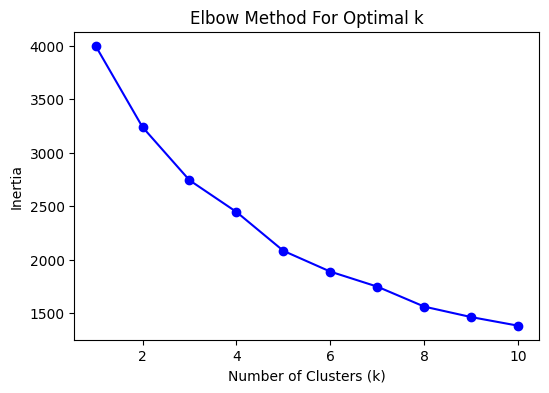

In [12]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


#  Apply K-Means Clustering

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42) 
df['Cluster'] = kmeans.fit_predict(scaled_data)
print(df.head())

  customer_id  age  income  spending_score  visits_per_month  Cluster
0    CUST1000   56  120186              55                 9        2
1    CUST1001   69   49674              80                 1        2
2    CUST1002   46   61271              62                 8        2
3    CUST1003   32   88688              30                 6        1
4    CUST1004   60  126076              55                 6        2


# Visualize the Clusters

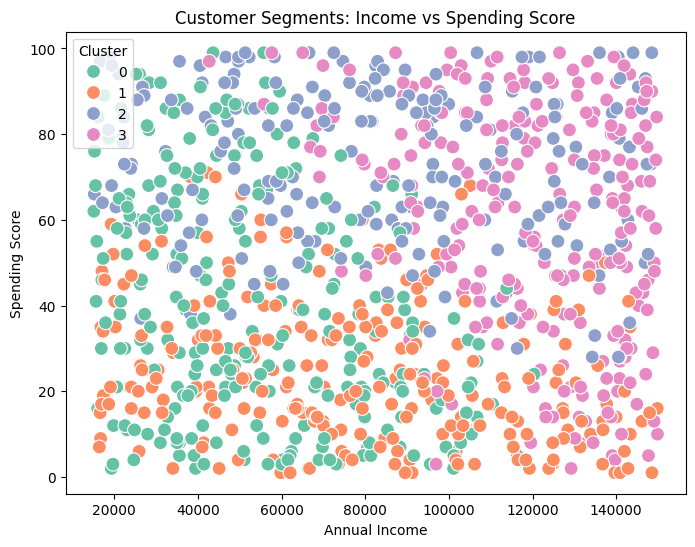

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='income', y='spending_score', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segments: Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


# Analyze the Segments

In [15]:
# Drop non-numeric columns before groupby-mean
numeric_cols = df.select_dtypes(include='number').columns  # only numeric columns
print(df.groupby('Cluster')[numeric_cols].mean())


               age         income  spending_score  visits_per_month  Cluster
Cluster                                                                     
0        47.471698   54372.600000       39.381132         15.000000      0.0
1        39.043825   77887.992032       24.776892          5.350598      1.0
2        52.040359   83310.071749       73.426009          5.721973      2.0
3        37.678161  120389.613027       59.969349         13.383142      3.0


In [16]:
df.to_csv("segmented_customers.csv", index=False)